In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/titanic data set/tested.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
if 'Ticket' in df.columns and 'Cabin' in df.columns:
    df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
else:
    print("Columns 'Ticket' and 'Cabin' not found.")

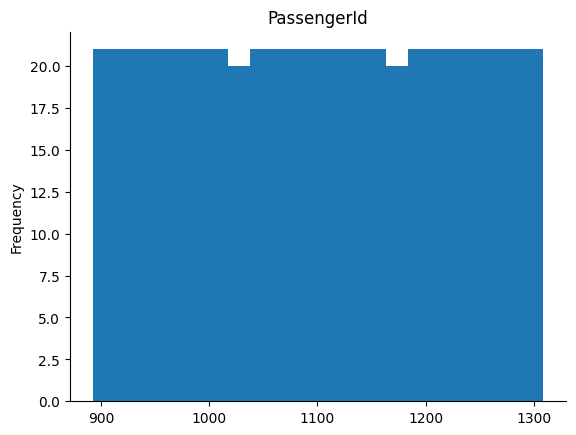

In [ ]:
# @title PassengerId
df['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

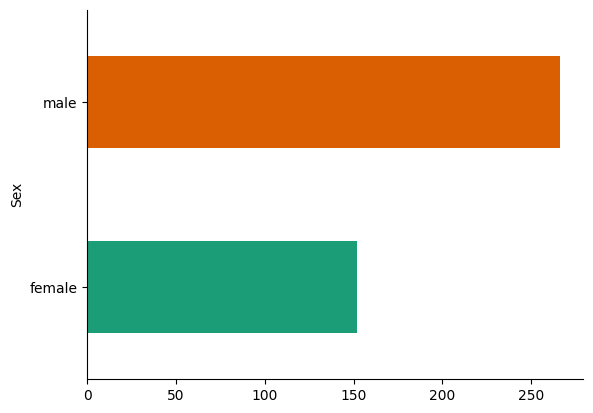

In [ ]:
# @title Sex
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Sex', ylabel='Survived'>

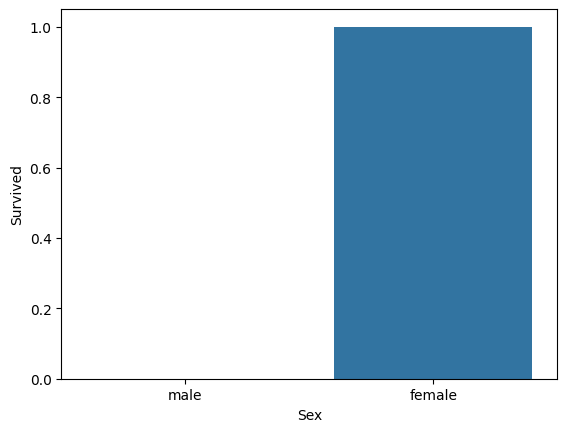

In [ ]:
# @title Survival Rate by Sex
sns.barplot(x = 'Sex', y = 'Survived', data = df)

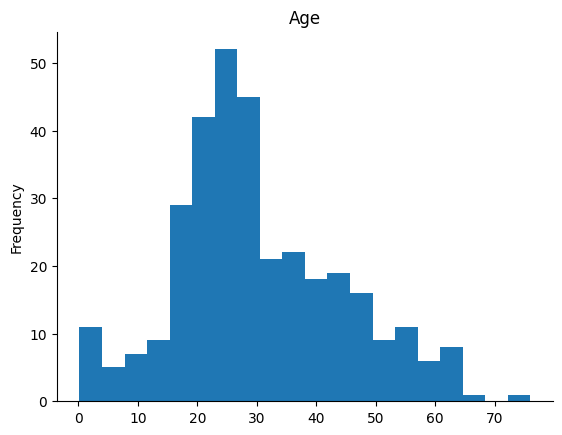

In [ ]:
# @title Age
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

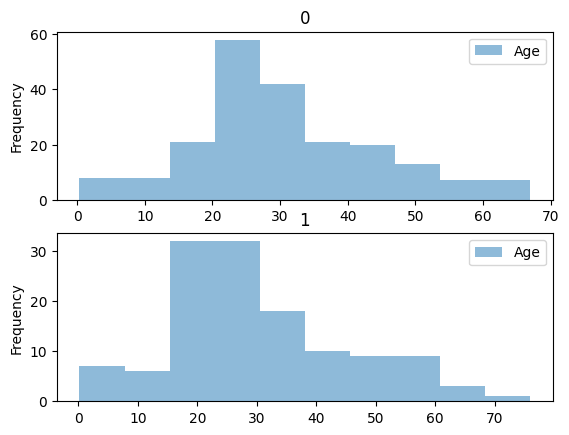

In [ ]:
# @title Age distribution by survival
df.plot.hist(column='Age', by='Survived', alpha=0.5)

<Axes: xlabel='Pclass', ylabel='Age'>

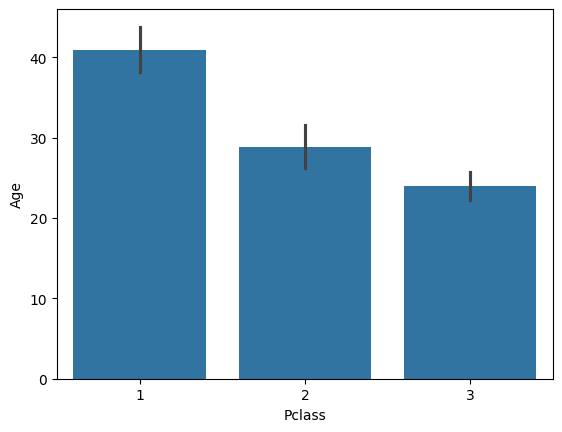

In [ ]:
# @title Average Age by Passenger Class
sns.barplot(x='Pclass', y='Age', data=df)

<Axes: ylabel='Survived'>

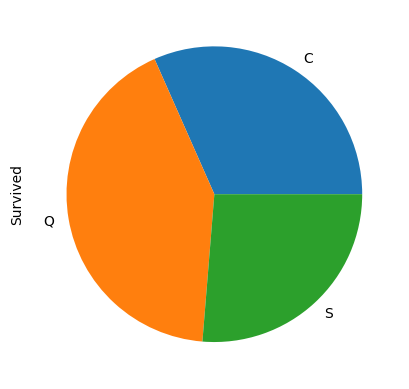

In [ ]:
# @title Survival rate by embarkation port
df.groupby('Embarked')['Survived'].mean().plot(kind='pie')

<Axes: xlabel='Age', ylabel='Count'>

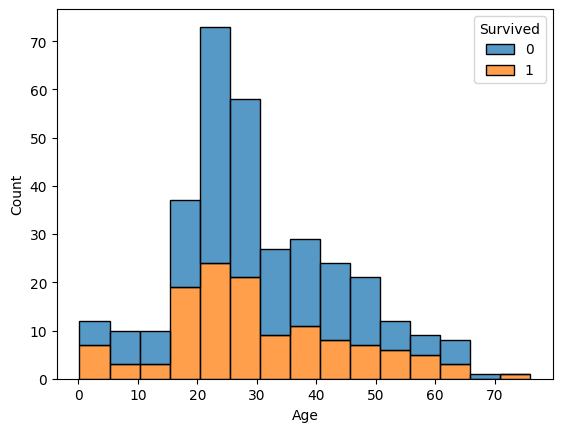

In [ ]:
# @title Age Distribution by Survival
sns.histplot(data = df, x = 'Age', hue = 'Survived', multiple='stack')

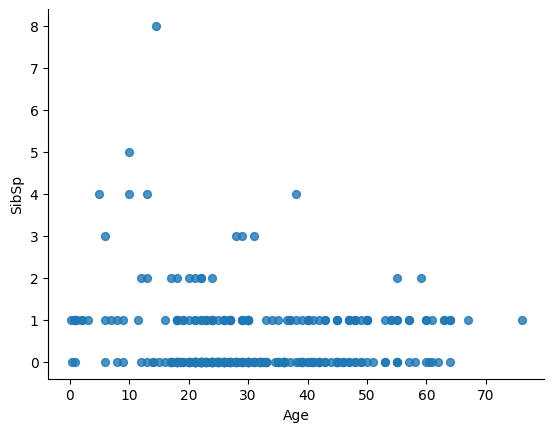

In [ ]:
# @title Age vs SibSp
df.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-52-e3561e032163>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survived_males = df[df['Sex'] == 'male'][df['Survived'] == 1].shape[0]
<ipython-input-52-e3561e032163>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_survived_males = df[df['Sex'] == 'male'][df['Survived'] == 0].shape[0]
<ipython-input-52-e3561e032163>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survived_females = df[df['Sex'] == 'female'][df['Survived'] == 1].shape[0]
<ipython-input-52-e3561e032163>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_survived_females = df[df['Sex'] == 'female'][df['Survived'] == 0].shape[0]


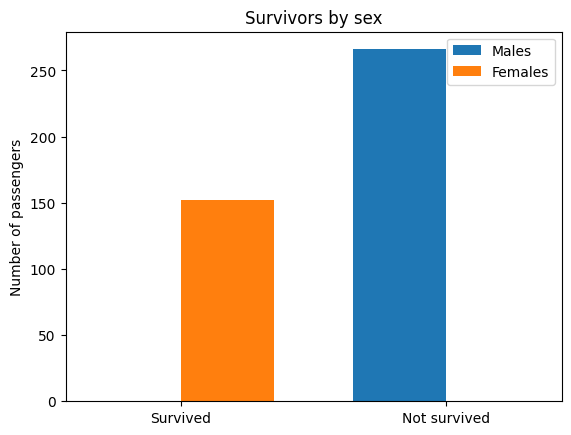

In [ ]:
survived_males = df[df['Sex'] == 'male'][df['Survived'] == 1].shape[0]
not_survived_males = df[df['Sex'] == 'male'][df['Survived'] == 0].shape[0]
survived_females = df[df['Sex'] == 'female'][df['Survived'] == 1].shape[0]
not_survived_females = df[df['Sex'] == 'female'][df['Survived'] == 0].shape[0]

data = {'Males': [survived_males, not_survived_males], 'Females': [survived_females, not_survived_females]}

fig, ax = plt.subplots()
width = 0.35
x = np.arange(len(data['Males']))
rects1 = ax.bar(x - width/2, data['Males'], width, label='Males')
rects2 = ax.bar(x + width/2, data['Females'], width, label='Females')

ax.set_ylabel('Number of passengers')
ax.set_title('Survivors by sex')
ax.set_xticks(x)
ax.set_xticklabels(['Survived', 'Not survived'])
ax.legend()
plt.show()

In [ ]:
#we see that only females survivedd

In [ ]:
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
else:
    print("Column 'Sex' not found.")

In [ ]:
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'])
else:
    print("Column 'Embarked' not found.")

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,False,True,False
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,False,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,False,True,False
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,False,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,27.0,0,0,8.0500,False,False,True
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,108.9000,True,False,False
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,7.2500,False,False,True
416,1308,0,3,"Ware, Mr. Frederick",0,27.0,0,0,8.0500,False,False,True


In [ ]:
X = df.drop(columns=['Survived','Name','PassengerId'])
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.08, random_state = 27)

In [ ]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [ ]:
# part of the data that would be used for the traing
X_train.shape

(384, 9)

In [ ]:
# part of the data that would be used to test the model
X_test.shape

(34, 9)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score

In [ ]:
# LinearRegression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
    ],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 1.0
MAE: 1.0995188554442728e-15
MSE: 3.368560605908132e-30


In [ ]:
LR_model=LogisticRegression(max_iter=1500)
LR_model.fit(X_train,y_train)

LogisticRegression(max_iter=1500)

In [ ]:
LR_model.score(X_train,y_train)

1.0

In [ ]:
LR_pred = LR_model.predict(X_test)

In [ ]:
LR_acc=accuracy_score(y_test,LR_pred)

In [ ]:
print(classification_report(y_test , LR_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00         7

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [ ]:
from sklearn.ensemble import RandomForestClassifier

df["Embarked_C"] = (df["Embarked_C"] == "C").astype(int)
df["Embarked_Q"] = (df["Embarked_Q"] == "Q").astype(int)
df["Embarked_S"] = (df["Embarked_S"] == "S").astype(int)

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]
target = "Survived"

model = RandomForestClassifier(n_estimators=100)
model.fit(df[features], df[target])

def predict_survival(passenger_id, df):
  try:
    passenger_data = df[df["PassengerId"] == passenger_id][features]
    return model.predict(passenger_data)[0]
  except ValueError:
    print(f"Passenger with ID {passenger_id} is predicted not to survive.")

passenger_id = int(input())

if predict_survival(passenger_id, df) == 1:
  print(f"Passenger {passenger_id} is predicted to survive.")
else:
  print(f"Passenger {passenger_id} is predicted not to survive.")

1307
Passenger 1307 is predicted not to survive.


## **By all the analysis and prediction we see that, this data set has the data of passengers who survived in the titanic incident. This data set contains only the data of the females who survivded, no data of male is present in the data set who survived.**

### So in summary when ever we give a passenger id of a women/female, prediction is always survived!!**bold text**